In [25]:
%load_ext autoreload
%autoreload 2
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
fname = "../data/type2W.layer=6.iters=20.classifier=sgd-log.masked=True.pickle"
with open(fname, "rb") as f:
    type2W = pickle.load(f)

In [70]:
type2W.keys()

dict_keys(['src', 'src_by', 'orc', 'orc_by', 'orrc', 'orrc_by', 'orrc_that', 'prc', 'prrc', 'prrc_that', 'all'])

In [71]:
src = type2W["src"]

In [72]:
src[1]

[0.9941666666666666,
 0.9341666666666667,
 0.8833333333333333,
 0.8675,
 0.8416666666666667,
 0.8391666666666666,
 0.8066666666666666,
 0.825,
 0.8225,
 0.8191666666666667,
 0.8166666666666667,
 0.8,
 0.79,
 0.7966666666666666,
 0.8016666666666666,
 0.7858333333333334,
 0.7858333333333334,
 0.7783333333333333,
 0.7833333333333333,
 0.7716666666666666]

In [73]:
mean_sims = []
mean_accs = []
stds = []

for i in range(20):
    
    vecs = np.array([type2W[key][0][i][0] for key in type2W.keys()])
    sims = cosine_similarity(vecs, vecs)
    mean_sim = np.median(sims)
    mean_sims.append(mean_sim)
    
    mean_acc = np.mean([type2W[key][1][i] for key in type2W.keys()])
    mean_accs.append(mean_acc)

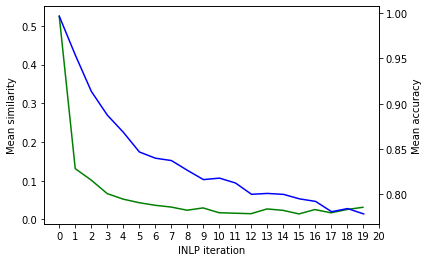

In [77]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(20), mean_sims, 'g-')
ax2.plot(range(20), mean_accs, 'b-')

ax1.set_xticks(range(21))
ax1.set_xlabel('INLP iteration')
ax1.set_ylabel('Mean similarity', )
ax2.set_ylabel('Mean accuracy')
plt.savefig("../results/plots/INLP-directions-variance.png", dpi = 200)

src 0.7716666666666666
src_by 0.7341666666666666
orc 0.7966666666666666
orc_by 0.7408333333333333
orrc 0.815
orrc_by 0.7616666666666667
orrc_that 0.8233333333333334
prc 0.79
prrc 0.7466666666666667
prrc_that 0.7358333333333333
all 0.8443333333333334


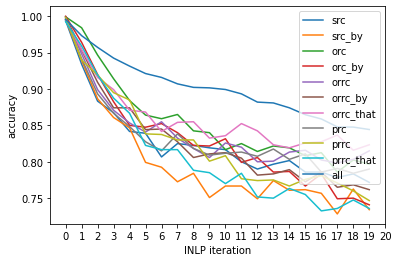

In [90]:
mean_sims = []
mean_accs = []
stds = []
fig, ax1 = plt.subplots()

for key in type2W.keys():
    accs = type2W[key][1]
    ax1.plot(range(20), accs, label = key)
    print(key, accs[-1])
    
ax1.set_xticks(range(21))
plt.legend()
ax1.set_xlabel('INLP iteration')
ax1.set_ylabel('accuracy')
plt.savefig("../results/plots/INLP-directions-accuracy.png", dpi = 200)

In [82]:
accs

[0.9956666666666667,
 0.9733333333333334,
 0.95725,
 0.9425,
 0.9315,
 0.92125,
 0.9159166666666667,
 0.9070833333333334,
 0.90225,
 0.9015833333333333,
 0.8993333333333333,
 0.8933333333333333,
 0.882,
 0.8808333333333334,
 0.8741666666666666,
 0.8646666666666667,
 0.8588333333333333,
 0.8479166666666667,
 0.8476666666666667,
 0.8443333333333334]